<a href="https://colab.research.google.com/github/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/blob/main/The_Best_Model_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download dataset

In [1]:
!wget https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2011.csv

--2024-12-25 04:38:54--  https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2011.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 562921 (550K) [text/plain]
Saving to: ‘gt_2011.csv’

gt_2011.csv         100%[===================>] 549.73K  --.-KB/s    in 0.03s   

2024-12-25 04:38:54 (18.3 MB/s) - ‘gt_2011.csv’ saved [562921/562921]



In [2]:
!wget https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2012.csv

--2024-12-25 04:39:00--  https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2012.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577617 (564K) [text/plain]
Saving to: ‘gt_2012.csv’

gt_2012.csv         100%[===================>] 564.08K  --.-KB/s    in 0.04s   

2024-12-25 04:39:00 (12.8 MB/s) - ‘gt_2012.csv’ saved [577617/577617]



In [3]:
!wget https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2013.csv

--2024-12-25 04:39:02--  https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2013.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540334 (528K) [text/plain]
Saving to: ‘gt_2013.csv’

gt_2013.csv         100%[===================>] 527.67K  --.-KB/s    in 0.04s   

2024-12-25 04:39:02 (14.2 MB/s) - ‘gt_2013.csv’ saved [540334/540334]



In [4]:
!wget https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2014.csv

--2024-12-25 04:39:04--  https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541009 (528K) [text/plain]
Saving to: ‘gt_2014.csv’

gt_2014.csv         100%[===================>] 528.33K  --.-KB/s    in 0.03s   

2024-12-25 04:39:04 (15.6 MB/s) - ‘gt_2014.csv’ saved [541009/541009]



In [5]:
!wget https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2015.csv

--2024-12-25 04:39:06--  https://raw.githubusercontent.com/aneeshmurali-n/ML-Turbine-Energy-Yield-Prediction-for-Gas-Turbine-Optimization/refs/heads/main/gt_2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 556928 (544K) [text/plain]
Saving to: ‘gt_2015.csv’

gt_2015.csv         100%[===================>] 543.88K  --.-KB/s    in 0.03s   

2024-12-25 04:39:07 (15.6 MB/s) - ‘gt_2015.csv’ saved [556928/556928]



# Import modules

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
#load dataset for train
df1=pd.read_csv("gt_2011.csv")
df2=pd.read_csv("gt_2012.csv")
df3=pd.read_csv("gt_2013.csv")

In [8]:
#concat dataframes along rows
train_dataset = pd.concat([df1, df2, df3], ignore_index=True,axis=0)

In [9]:
#load dataset for test
df4=pd.read_csv("gt_2014.csv")
df5=pd.read_csv("gt_2015.csv")

In [10]:
#concat dataframes along rows
test_df = pd.concat([df4, df5], ignore_index=True,axis=0)

#model pipeline

In [12]:
# Function for outlier capping with IQR
def cap_outliers_iqr(X):
    X = pd.DataFrame(X) # Convert the input to a pandas DataFrame if it's not already
    X.columns = ['AFDP', 'TIT', 'CDP', 'CO']  # Set the column names for the DataFrame
    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X[col] = np.where(X[col] < lower_bound, lower_bound, np.where(X[col] > upper_bound, upper_bound, X[col]))
    return X.to_numpy() # Convert the DataFrame back to a NumPy array before returning

# Function to apply square transformation to specific columns
def square_transform(X):
    X_df = pd.DataFrame(X, columns=['AFDP', 'TIT', 'CDP', 'CO']) # New DataFrame with column names
    X_df['TIT'] = np.square(X_df['TIT']) # Transformation on new DataFrame
    return X_df.to_numpy() # Convert back to numpy array

# Function to apply log1p transformation to specific columns
def log1p_transform(X):
    X_df = pd.DataFrame(X, columns=['AFDP', 'TIT', 'CDP', 'CO']) # New DataFrame with column names
    X_df['CO'] = np.log1p(X_df['CO']) # Transformation on new DataFrame
    return X_df.to_numpy() # Convert back to numpy array



# Define column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('square_transform', FunctionTransformer(square_transform)),
            ('log1p_transform', FunctionTransformer(log1p_transform)),
            ('outlier_capping', FunctionTransformer(cap_outliers_iqr)),
            ('scaler', StandardScaler()),
        ]), ['AFDP', 'TIT', 'CDP', 'CO']),
    ],
    remainder='drop'  # Drop other columns
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()),
])

In [13]:
x_train = train_dataset.drop('TEY',axis=1)
y_train = train_dataset['TEY']

In [14]:
#fit model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('square_transform',
                                                                   FunctionTransformer(func=<function square_transform at 0x7b333efb9a20>)),
                                                                  ('log1p_transform',
                                                                   FunctionTransformer(func=<function log1p_transform at 0x7b333efb9ab0>)),
                                                                  ('outlier_capping',
                                                                   FunctionTransformer(func=<function cap_outliers_iqr at 0x7b333efb8790>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AFDP', 'TIT', 'CDP',
                                                   'CO'])])),
                ('regressor', LinearRegression())])

In [15]:
# make prediction
x_test = test_df.drop('TEY',axis=1)
y_test = test_df['TEY']
# Make predictions on test dataset
y_pred = pipeline.predict(x_test)

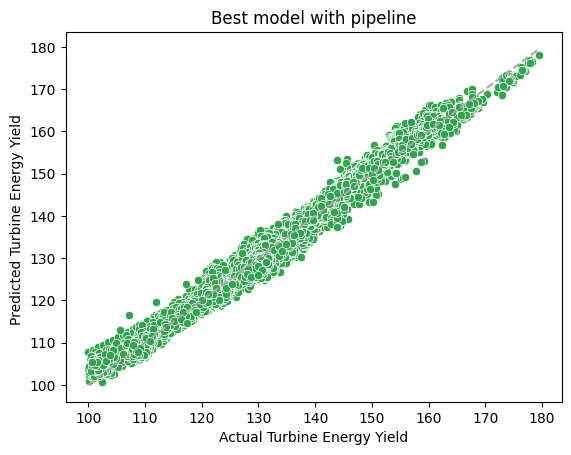

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Best model with pipeline')
sns.scatterplot(x=y_test, y=y_pred , color='#34a251')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#a8a8a8')
plt.xlabel('Actual Turbine Energy Yield')
plt.ylabel('Predicted Turbine Energy Yield ')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",r2)

MSE:  4.640150196577871
MAE:  1.7801096530275642
R2:  0.9793092627915607


In [18]:
import pickle
with open('turbine_energy_yield_prediction_model_by_amn.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [19]:
# download model file
from google.colab import files
files.download('turbine_energy_yield_prediction_model_by_amn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>